# Football Data Analysis & Visualization


## Names : Madhuj Agrawal





<p> We analyze:</p>

<b>A. Analyzing Leagues</b>
1. Top 5 Leagues by turnover in selling player
2. Top 5 Leagues by turnover in buying player
3. Profits of League
4. Summary

<b>B. Analyzing Clubs</b>
1. Top Sellers
2. Top Buyers
3. Profitable Clubs
4. Summary

<b>C. Positions</b>
1. Different Positions Bought
2. Individual Position and top teams buying that position
3. Top Buying Team for each position
4. Top Selling Team for each position
5. Summary of Top Buying and Top Selling Position for each position

<b>D. Teams and Transfer</b>
1. Highest Bought Player for each Team
2. Highest Sold Player for each Team
3. Summary

<b>E. Age Analysis w.r.t Transfer Fee</b>
1. Number of players for each age
2. Age and Tranfer relation represented by:
i. Scatterplot
ii. Jointplot
iii. Regplot
iv. Lineplot

<b>F. Seasons and Transfer Fee</b>
1. Total Tranfer Fee per Season
2. Total Tranfer Fee per Season for Top Leagues
3. Total Position Brought each Season in Premier League

<b>G. Chelsea Analysis  -  A specific club analysis</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

In [12]:
df = pd.read_csv('transfer.csv')
print(df.head())

                Name        Position  Age     Team_from     League_from  \
0          Luís Figo    Right Winger   27  FC Barcelona          LaLiga   
1      Hernán Crespo  Centre-Forward   25         Parma         Serie A   
2      Marc Overmars     Left Winger   27       Arsenal  Premier League   
3  Gabriel Batistuta  Centre-Forward   31    Fiorentina         Serie A   
4     Nicolas Anelka  Centre-Forward   21   Real Madrid          LaLiga   

        Team_to League_to     Season  Market_value  Transfer_fee  
0   Real Madrid    LaLiga  2000-2001           NaN      60000000  
1         Lazio   Serie A  2000-2001           NaN      56810000  
2  FC Barcelona    LaLiga  2000-2001           NaN      40000000  
3       AS Roma   Serie A  2000-2001           NaN      36150000  
4      Paris SG   Ligue 1  2000-2001           NaN      34500000  


#### Replacing Positions with a more general position
F: Forward
M: Midfield
D: Defender
G: Goalkeeper

In [8]:
position_map = {'Right Winger': 'F','Centre-Forward':'F','Left Winger':'F','Centre-Back':'D','Central Midfield':
               'M','Attacking Midfield': 'M', 'Defensive Midfield': 'M','Second Striker': 'F', 'Goalkeeper': 'G',
               'Right-Back':'D','Left Midfield': 'M', 'Left-Back':'D','Right Midfield':'M','Forward':'F','Sweeper':'M',
               'Defender':'D','Midfielder':'M'}

In [9]:
df['New_position'] = pd.Series(df.Position.map(position_map), index = df.index)

In [10]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

## Analyzing League

### Top 5 Leagues by turnover in Selling Player

In [6]:
league_from = df.groupby(['League_from'])['Transfer_fee'].sum()
top5sell_league = league_from.sort_values(ascending = False).head(5)
top5sell_league = top5sell_league / 1000000 
top5sell_league.head()

League_from
Premier League    7248.51
Serie A           7083.98
LaLiga            5533.86
Ligue 1           4396.89
1.Bundesliga      3062.96
Name: Transfer_fee, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

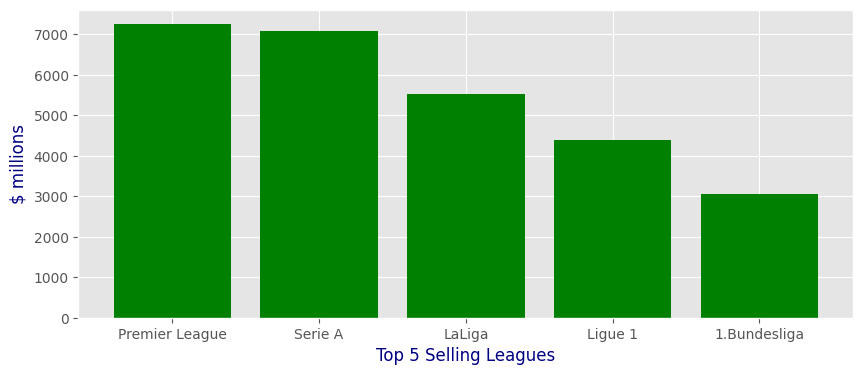

In [7]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(top5sell_league.index, top5sell_league.values, color='green')
ax.set_ylabel("$ millions", color='navy')
ax.set_xlabel("Top 5 Selling Leagues", color='navy')
plt.show

### Top 5 Leagues by turnover in Buying Player

In [13]:
league_to = df.groupby(['League_to'])['Transfer_fee'].sum()
top5buy_league = league_to.sort_values(ascending = False).head(5)
top5buy_league = top5buy_league/1000000
top5buy_league.head()

League_to
Premier League    14695.400
Serie A            7535.220
LaLiga             6680.360
Ligue 1            3682.720
1.Bundesliga       3599.645
Name: Transfer_fee, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

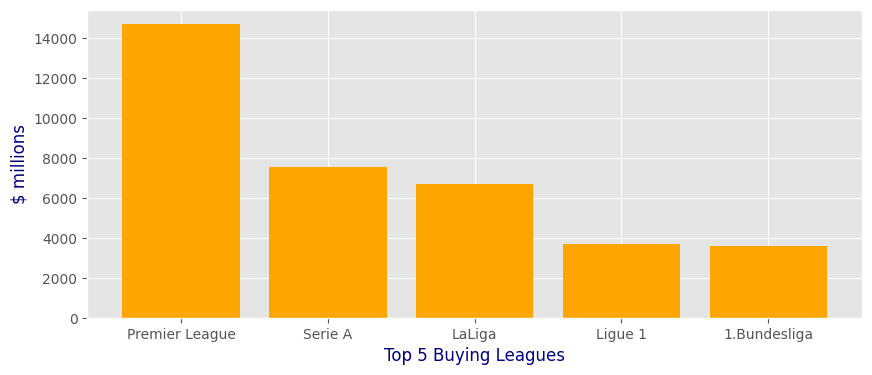

In [14]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(top5buy_league.index, top5buy_league.values, color='orange')
ax.set_ylabel("$ millions", color='navy')
ax.set_xlabel("Top 5 Buying Leagues", color='navy')
plt.show

### Summary 

In [15]:
diff_league = top5sell_league - top5buy_league  
diff_league = diff_league.sort_values(ascending = False)
diff_league.head()

League_from
Ligue 1            714.170
Serie A           -451.240
1.Bundesliga      -536.685
LaLiga           -1146.500
Premier League   -7446.890
Name: Transfer_fee, dtype: float64

In [16]:
league_summary = pd.concat([top5sell_league,top5buy_league],axis = 1)
league_summary['Diff'] = diff_league
new_columns = league_summary.columns.values
new_columns[[0,1]]=['sell','buy']
league_summary.columns = new_columns
league_summary.fillna(0)
league_summary.head(5)

,sell,buy,Diff
Premier League,7248.51,14695.400,-7446.890
Serie A,7083.98,7535.220,-451.240
LaLiga,5533.86,6680.360,-1146.500
Ligue 1,4396.89,3682.720,714.170
1.Bundesliga,3062.96,3599.645,-536.685


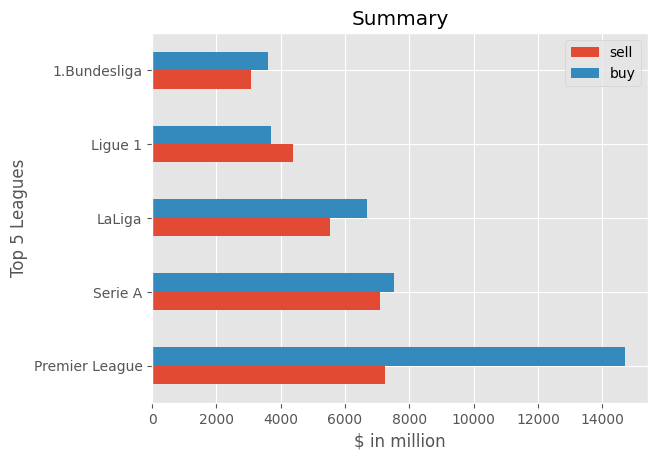

In [18]:
a = league_summary.reset_index()
a.plot(x='index',y=['sell','buy'],kind='barh')
plt.title('Summary')
plt.ylabel('Top 5 Leagues')
plt.xlabel('$ in million')
plt.show()

We observe that Premier League Teams certaining spends more money in buying then selling as compared to all leagues.
Also Ligue 1 is the only among the top 5 who earned more from selling.

## Analyzing Clubs 

### Top Sellers 
Total Money gained divided by Total Players sold

In [19]:
sellers = df.groupby(['Team_from'])['Transfer_fee'].sum()
total_sold = df.groupby(['Team_from'])['Transfer_fee'].count()
biggest_sellers = (sellers/1000000) / total_sold 
biggest_sellers = biggest_sellers.sort_values(ascending  = False).head()
biggest_sellers

Team_from
Athletic Bilbao    31.800000
RB Leipzig         23.300000
Monaco             20.173830
FC Augsburg        20.000000
FC Barcelona       19.792105
Name: Transfer_fee, dtype: float64

### Top Buyers
Total Money spent divided by Total Players bought

In [20]:
buyers = df.groupby(['Team_to'])['Transfer_fee'].sum()
total_sold = df.groupby(['Team_to'])['Transfer_fee'].count()
biggest_buyers = (buyers/1000000) / total_sold 
biggest_buyers = biggest_buyers.sort_values(ascending  = False).head()
biggest_buyers

Team_to
SIPG            25.983333
FC Barcelona    23.900571
CC Yatai        23.300000
Man Utd         23.036308
Real Madrid     22.408667
Name: Transfer_fee, dtype: float64

#### Top Sellers and Top Buyers graphically

<function matplotlib.pyplot.show(close=None, block=None)>

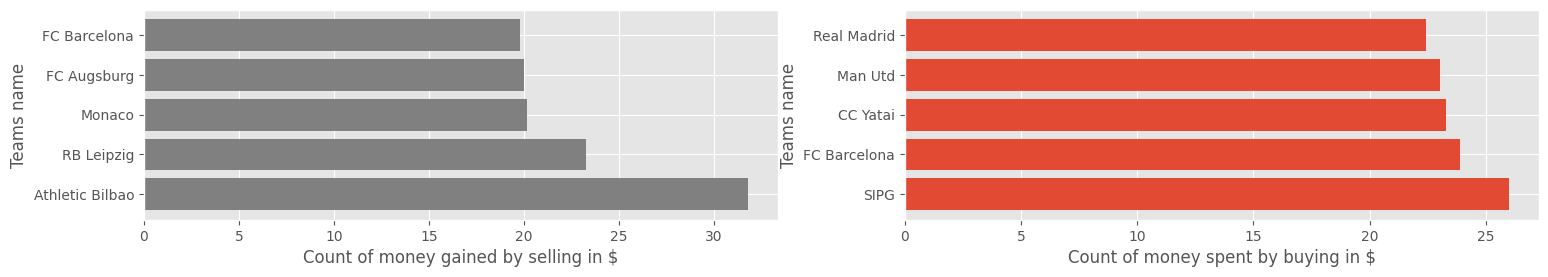

In [21]:
plt.figure(figsize=(18,6))

plt.subplot(2,2,1)
plt.barh(biggest_sellers.index, biggest_sellers.values,color='grey')
plt.xlabel("Count of money gained by selling in $")
plt.ylabel("Teams name")

plt.subplot(2,2,2)
plt.barh(biggest_buyers.index, biggest_buyers.values)
plt.xlabel("Count of money spent by buying in $")
plt.ylabel("Teams name")

plt.show

### Summary

In [17]:
profit_club = sellers - buyers  
profit_club = profit_club.sort_values(ascending = False)
profit_club = profit_club.dropna()
profit_club = profit_club/1000000
top5profit = profit_club.head()
top5loss = profit_club.tail()
print(top5profit)
print()
print(top5loss)

FC Porto          556.74
Benfica           451.05
Udinese Calcio    342.50
River Plate       324.63
Parma             263.79
Name: Transfer_fee, dtype: float64

Paris SG        -880.15
FC Barcelona    -920.94
Man Utd         -969.79
Chelsea         -981.12
Man City       -1381.27
Name: Transfer_fee, dtype: float64


C:\Users\Shashi\AppData\Local\Temp\ipykernel_10348\1074721098.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


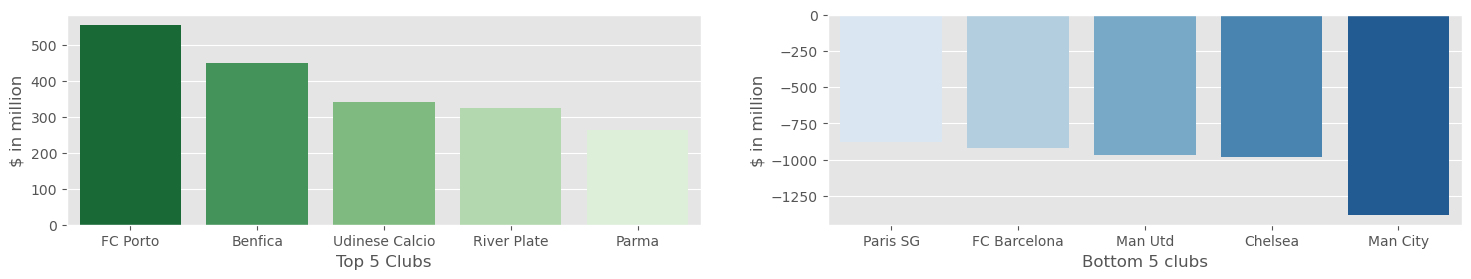

In [21]:
plt.figure(figsize=(18,6))
plt.title("Top 5 and Bottom 5")

plt.subplot(2,2,1)
sns.barplot(x=top5profit.index,y=top5profit.values,palette = "Greens_r")
plt.xlabel("Top 5 Clubs")
plt.ylabel("$ in million")

plt.subplot(2,2,2)
sns.barplot(x=top5loss.index,y=top5loss.values,palette = "Blues")
plt.xlabel("Bottom 5 clubs")
plt.ylabel("$ in million")

plt.show()

We can observe that from the top 5, 2 teams belong to "Portuguese league" and from bottom 5, 3 clubs belong in "Premier League"  

## Positions

### Different Position Bought 

Centre-Forward        1218
Centre-Back            714
Central Midfield       487
Attacking Midfield     426
Defensive Midfield     411
Right Winger           305
Left Winger            267
Left-Back              225
Right-Back             181
Goalkeeper             180
Second Striker         130
Left Midfield           87
Right Midfield          63
Forward                  3
Sweeper                  1
Defender                 1
Midfielder               1
Name: Position, dtype: int64


Text(0, 0.5, 'Number of Players bought')

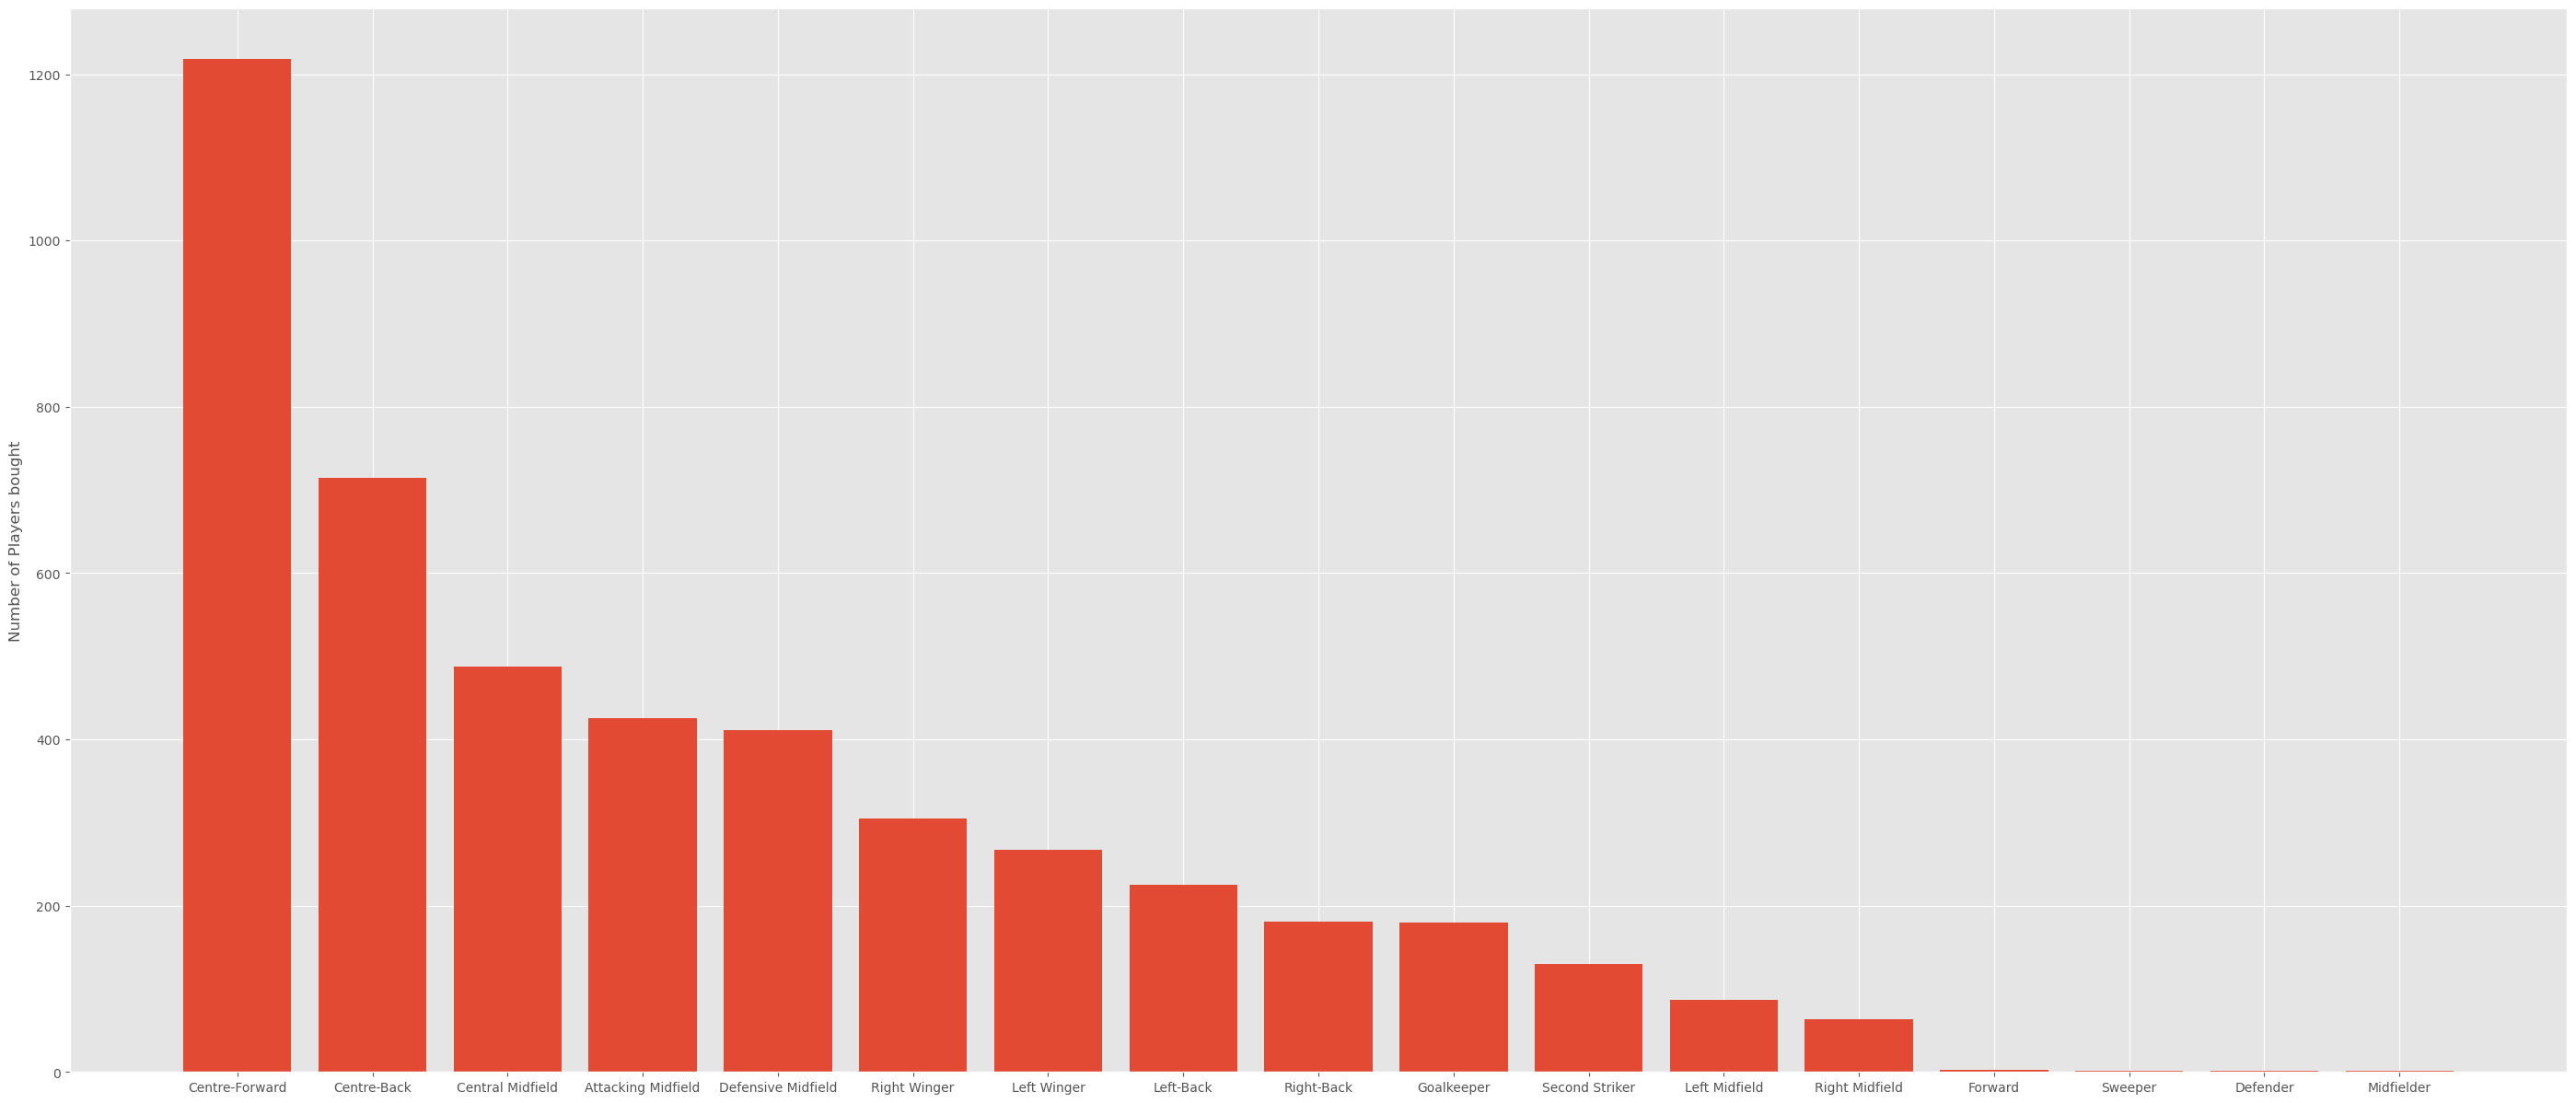

In [22]:
each_position = df.Position.value_counts()
print(each_position)
fig, ax = plt.subplots(figsize=(35,15))
ax.bar(each_position.index, each_position.values)
ax.set_ylabel("Number of Players bought")

No doubt that the demand from centre forward position is much greater than any position.

Values by New Position

F    1923
M    1476
D    1121
G     180
Name: New_position, dtype: int64


Text(0.5, 0, 'Positions')

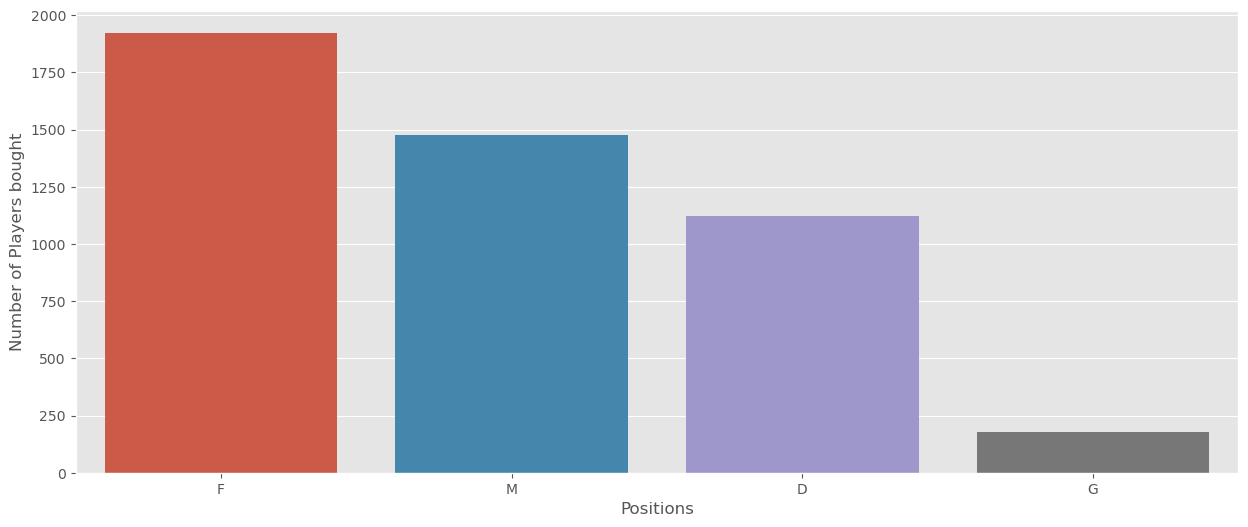

In [23]:
each_position_g = df.New_position.value_counts()
print(each_position_g)
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x=each_position_g.index, y=each_position_g.values)
ax.set_ylabel("Number of Players bought")
ax.set_xlabel("Positions")

### Individual Position and Top Teams buying that position

* Here we look into a Attacking Midfield

Team_to
Real Madrid    9
Marseille      8
FC Porto       7
Fenerbahce     7
Inter          7
Name: Team_to, dtype: int64


Text(0, 0.5, 'Number of Players bought')

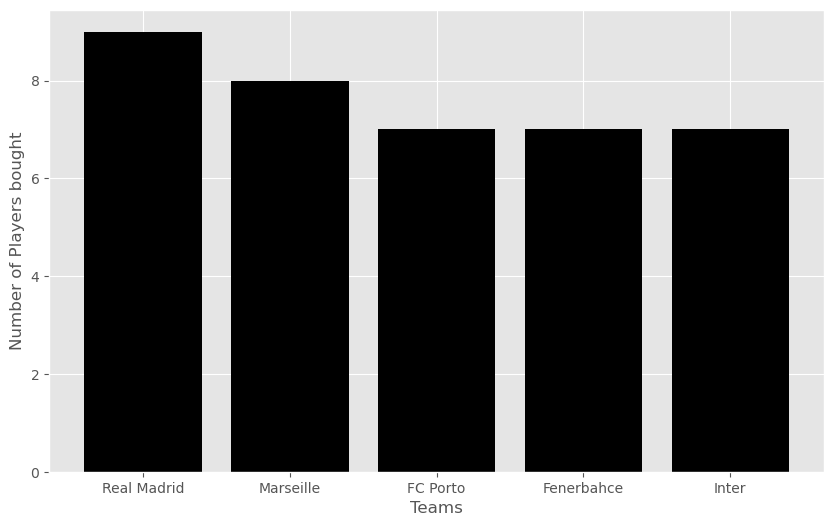

In [24]:
def Position_bought(pos):
    positions_bought = df.groupby(['Position'])['Team_to'].value_counts() 
    position = positions_bought.loc[pos]
    position_top5 = position.head(5)
    print(position_top5)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(position_top5.index, position_top5.values,color='Black')
    ax.set_xlabel("Teams")
    return ax.set_ylabel("Number of Players bought")

Position_bought('Attacking Midfield')

Values by New Position

Team_to
Real Madrid    33
Chelsea        32
Spurs          29
Inter          28
Juventus       27
Name: Team_to, dtype: int64


Text(0, 0.5, 'Number of Players bought')

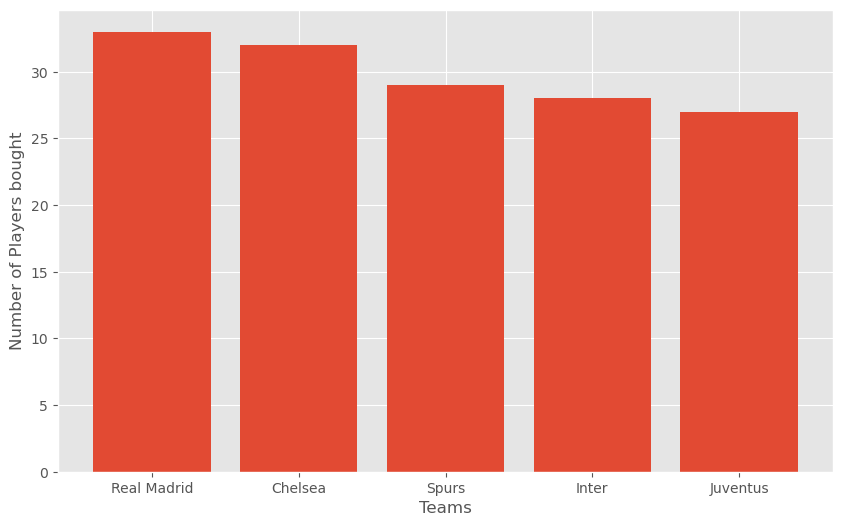

In [25]:
def Position_bought(pos):
    positions_bought = df.groupby(['New_position'])['Team_to'].value_counts() 
    position = positions_bought.loc[pos]
    position_top5 = position.head(5)
    print(position_top5)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(position_top5.index, position_top5.values)
    ax.set_xlabel("Teams")
    return ax.set_ylabel("Number of Players bought")

Position_bought('M') #Finding Midfields Bought

### Top Buying Team for each position

In [22]:
all_position_buy = df.groupby(['Position'])
position_team_buy = df.groupby(['Position'])['Team_to'].value_counts()
pos_list_buy=[]
team_list_buy=[]
count_list_buy=[]

for pos,name in all_position_buy:
    top_team_name = position_team_buy[pos].index[0]
    count = position_team_buy[pos][0]
    team_list_buy.append(top_team_name)
    count_list_buy.append(count)
    pos_list_buy.append(pos)
    
pos_team_buy = pd.DataFrame({'Position':pos_list_buy,'Team':team_list_buy,'Players Bought':count_list_buy})
pos_team_buy = pos_team_buy.set_index('Position')
pos_team_buy.sort_values(by='Players Bought',ascending = False,inplace = True)
pos_team_buy

C:\Users\madhu\AppData\Local\Temp\ipykernel_24132\732359103.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = position_team_buy[pos][0]


,Team,Players Bought
Position,,
"(Centre-Forward,)",AC Milan,21
"(Centre-Back,)",Spurs,20
"(Central Midfield,)",Juventus,14
"(Defensive Midfield,)",Chelsea,12
"(Left Winger,)",Atlético Madrid,12
"(Attacking Midfield,)",Real Madrid,9
"(Goalkeeper,)",Man Utd,9
"(Left-Back,)",Inter,9
"(Right Winger,)",AS Roma,8


TypeError: 'value' must be an instance of str or bytes, not a tuple

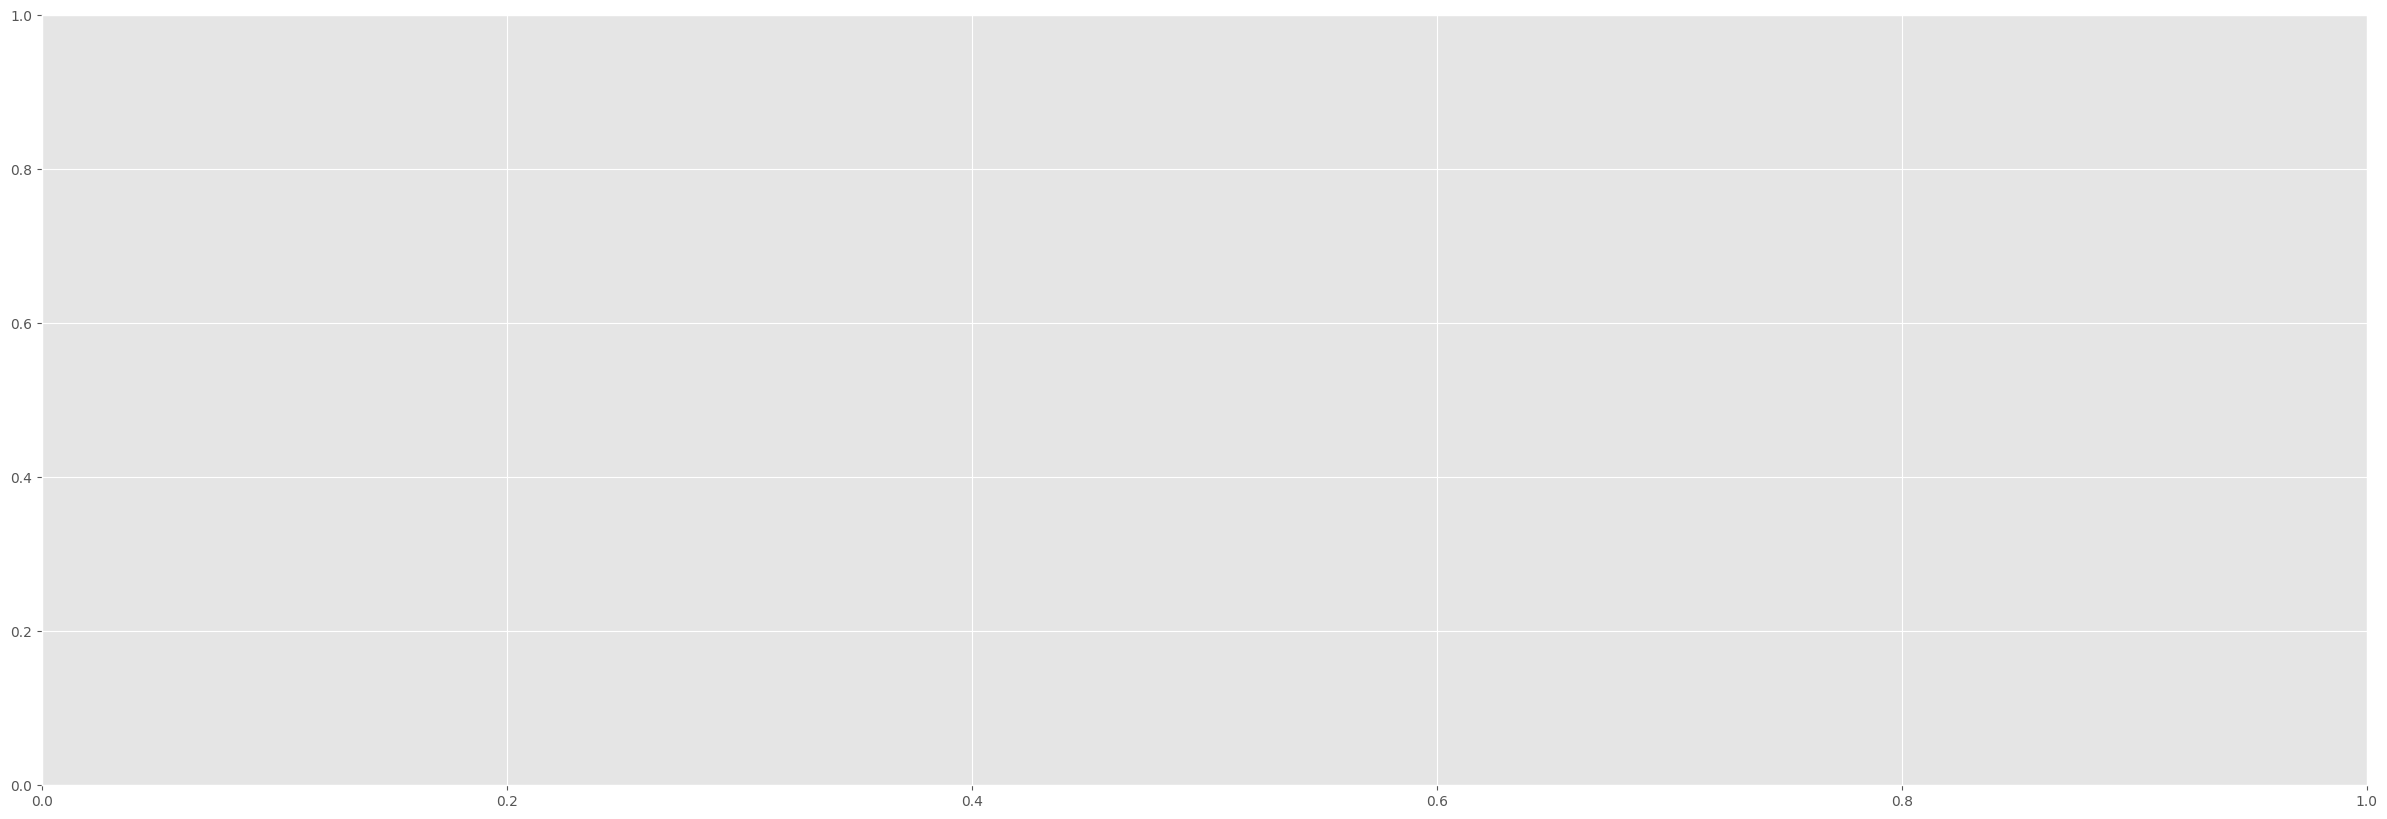

In [23]:
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(x = pos_team_buy.index,height = pos_team_buy['Players Bought'])
ax.set_ylabel("Number of Players bought")
ax.set_xticklabels(labels=(pos_team_buy.index +'\n'+ pos_team_buy['Team']), color='navy')
ser_xticklables?

### Top Selling Team for each position

In [28]:
#tells us which player position is sold by which team the most time 
all_position_sell = df.groupby(['Position'])
position_team_sell = df.groupby(['Position'])['Team_from'].value_counts()
pos_list_sell=[]
team_list_sell=[]
count_list_sell=[]

for pos,name in all_position_sell:
    top_team_name = position_team_sell[pos].index[0]
    count = position_team_sell[pos][0]
    team_list_sell.append(top_team_name)
    count_list_sell.append(count)
    pos_list_sell.append(pos)
    
pos_team_sell = pd.DataFrame({'Position':pos_list_sell,'Team':team_list_sell,'Players Sold':count_list_sell})
pos_team_sell = pos_team_sell.set_index('Position')
pos_team_sell.sort_values(by='Players Sold',ascending = False,inplace = True)
pos_team_sell

C:\Users\Shashi\AppData\Local\Temp\ipykernel_10348\706107508.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for pos,name in all_position_sell:


,Team,Players Sold
Position,,
Centre-Forward,Inter,18
Defensive Midfield,Real Madrid,12
Centre-Back,FC Porto,11
Central Midfield,Atalanta,11
Attacking Midfield,Corinthians,9
Right Winger,FC Barcelona,8
Left Winger,Liverpool,7
Second Striker,Inter,6
Right-Back,FC Porto,6


C:\Users\Shashi\AppData\Local\Temp\ipykernel_10348\3875419617.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=pos_team_sell.index +'\n'+ pos_team_sell['Team'], color='navy')


Object `ser_xticklables` not found.


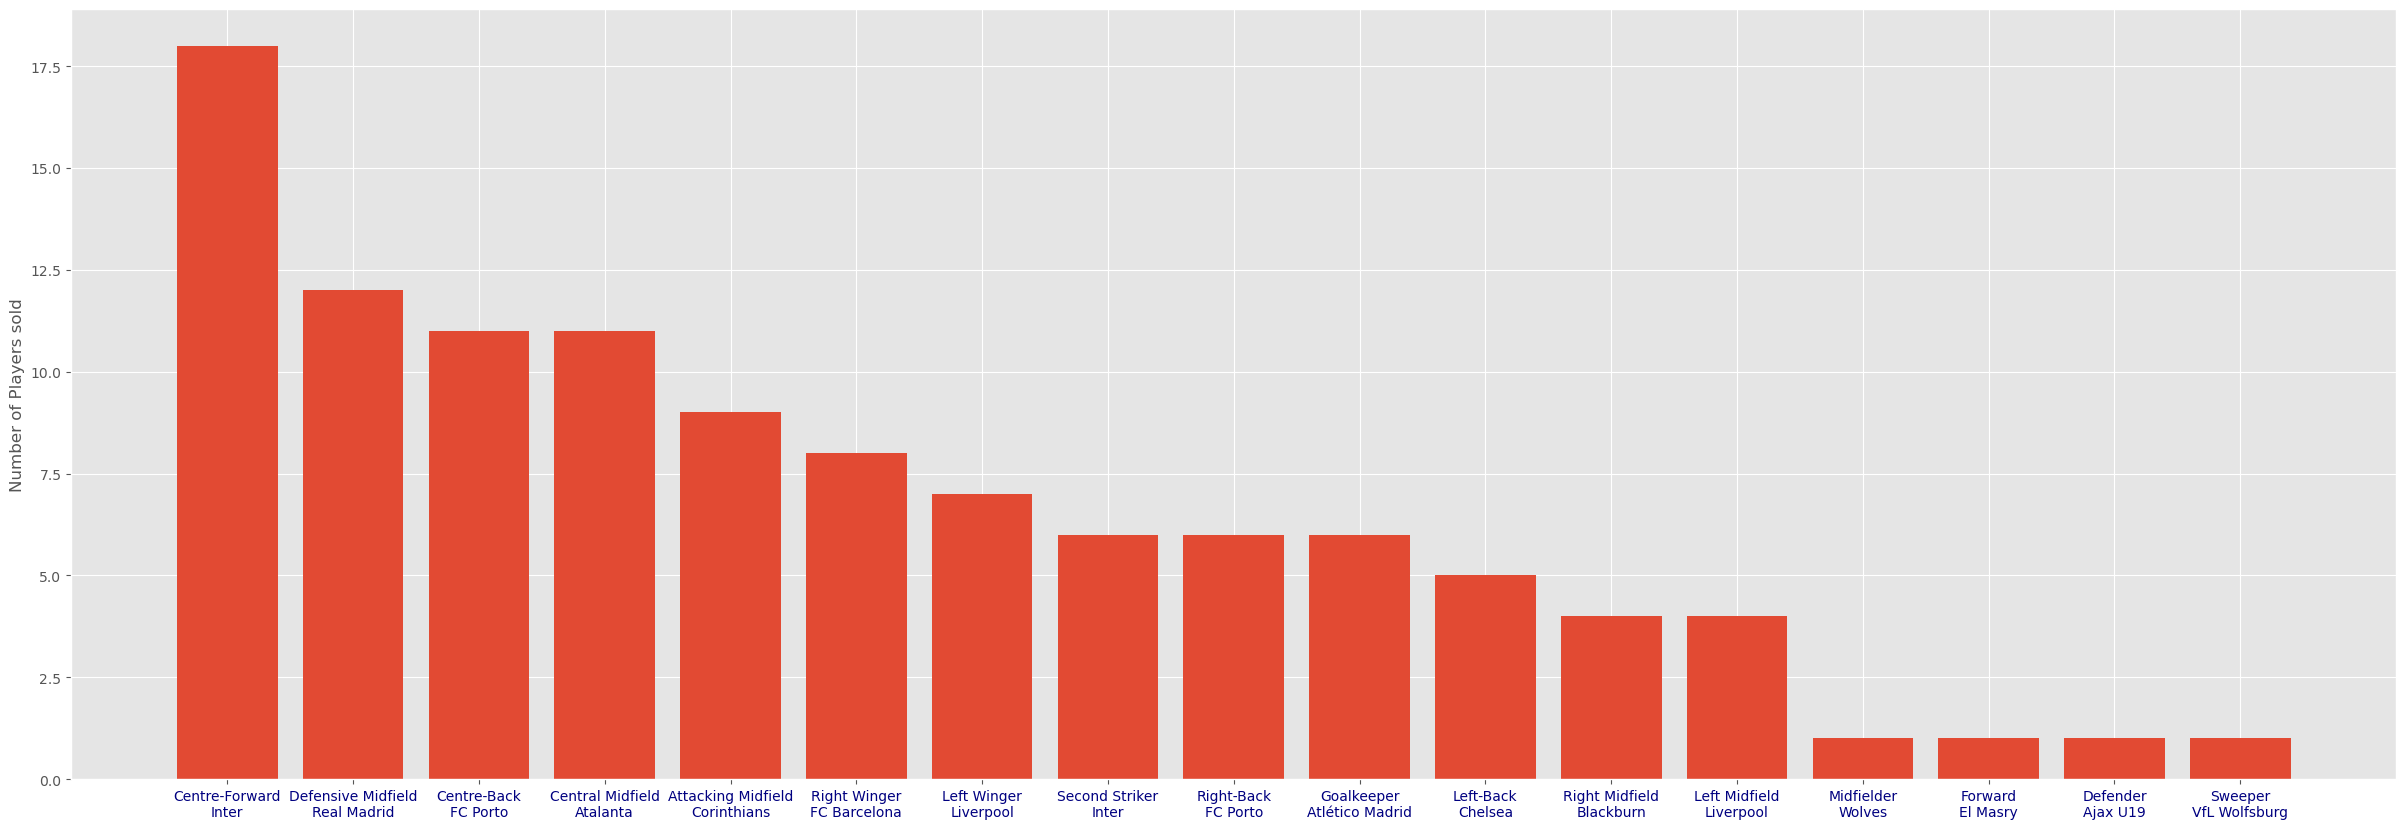

In [29]:
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(x = pos_team_sell.index,height = pos_team_sell['Players Sold'])
ax.set_ylabel("Number of Players sold")
ax.set_xticklabels(labels=pos_team_sell.index +'\n'+ pos_team_sell['Team'], color='navy')
ser_xticklables?

### Summary 

In [30]:
positions_transfer_summary = pd.merge(pos_team_buy,pos_team_sell,on = "Position")
positions_transfer_summary = positions_transfer_summary.rename(columns={'Team_x': 'Team Bought','Team_y':'Team Sold'})
positions_transfer_summary

,Team Bought,Players Bought,Team Sold,Players Sold
Position,,,,
Centre-Forward,AC Milan,21,Inter,18
Centre-Back,Spurs,20,FC Porto,11
Central Midfield,Juventus,14,Atalanta,11
Defensive Midfield,Chelsea,12,Real Madrid,12
Left Winger,Atlético Madrid,12,Liverpool,7
Attacking Midfield,Real Madrid,9,Corinthians,9
Goalkeeper,Man Utd,9,Atlético Madrid,6
Left-Back,Inter,9,Chelsea,5
Right Winger,AS Roma,8,FC Barcelona,8


## Teams and  Transfer 

###  Highest Bought Player for each team

In [31]:
buy_filter = df.filter(['Team_to','Name','Transfer_fee','New_position'])
buy_filter = buy_filter.sort_values(['Team_to','Transfer_fee'],ascending = [True,False]).groupby(['Team_to']).first()
top1buy = buy_filter.sort_values('Transfer_fee',ascending = False)
top1buy = top1buy.reset_index()
top1buy = top1buy.rename(columns = {'Team_to':'Team'})
top1buy = top1buy.set_index('Team')
top1buy.head(10)

,Name,Transfer_fee,New_position
Team,,,
Paris SG,Neymar,222000000,F
FC Barcelona,Philippe Coutinho,125000000,M
Juventus,Cristiano Ronaldo,117000000,F
Man Utd,Paul Pogba,105000000,M
Real Madrid,Gareth Bale,101000000,F
Liverpool,Virgil van Dijk,78800000,D
Man City,Kevin De Bruyne,76000000,M
Atlético Madrid,Thomas Lemar,70000000,F
Chelsea,Álvaro Morata,66000000,F


###  Highest Sold Player for each team

In [32]:
sell_filter = df.filter(['Team_from','Name','Transfer_fee','New_position'])
sell_filter = sell_filter.sort_values(['Team_from','Transfer_fee'],ascending = [True,False]).groupby(['Team_from']).first()
#top1sell = sell_filter.first()
top1sell = sell_filter.sort_values('Transfer_fee',ascending = False)
top1sell = top1sell.reset_index()
top1sell = top1sell.rename(columns = {'Team_from':'Team'})
top1sell = top1sell.set_index('Team')
top1sell.head(10)
#top1sell.head(10)
#type(top1sell)

,Name,Transfer_fee,New_position
Team,,,
FC Barcelona,Neymar,222000000,F
Monaco,Kylian Mbappé,135000000,F
Liverpool,Philippe Coutinho,125000000,M
Real Madrid,Cristiano Ronaldo,117000000,F
Bor. Dortmund,Ousmane Dembélé,115000000,F
Juventus,Paul Pogba,105000000,M
Spurs,Gareth Bale,101000000,F
Man Utd,Cristiano Ronaldo,94000000,F
SSC Napoli,Gonzalo Higuaín,90000000,F


### Summary 

In [33]:
transfer_summary = pd.merge(top1buy,top1sell,on='Team')
transfer_summary = transfer_summary.rename(columns={'Name_x': 'Player Bought','Name_y':'Player Sold', 
                                                    'Transfer_fee_x': 'Bought For','Transfer_fee_y':'Sold For'})
transfer_summary.head(5)

,Player Bought,Bought For,New_position_x,Player Sold,Sold For,New_position_y
Team,,,,,,
Paris SG,Neymar,222000000,F,David Luiz,35000000,D
FC Barcelona,Philippe Coutinho,125000000,M,Neymar,222000000,F
Juventus,Cristiano Ronaldo,117000000,F,Paul Pogba,105000000,M
Man Utd,Paul Pogba,105000000,M,Cristiano Ronaldo,94000000,F
Real Madrid,Gareth Bale,101000000,F,Cristiano Ronaldo,117000000,F


Prices for Forward Position is certaininly greater and most costly for the teams to buy

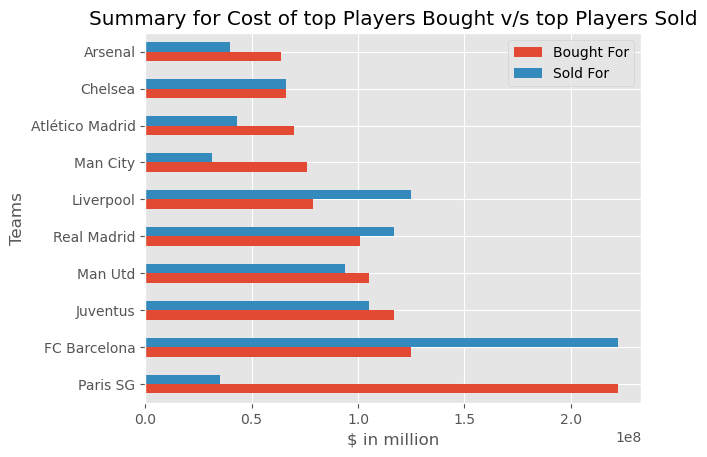

In [34]:
a = transfer_summary.reset_index().head(10)
a.plot(x='Team',y=['Bought For','Sold For'],kind='barh')
plt.title('Summary for Cost of top Players Bought v/s top Players Sold')
plt.ylabel('Teams')
plt.xlabel('$ in million')
plt.show()

## Age Analysis w.r.t Transfer Fee 

### Number of Players for Each Age  

<Axes: xlabel='Age', ylabel='count'>

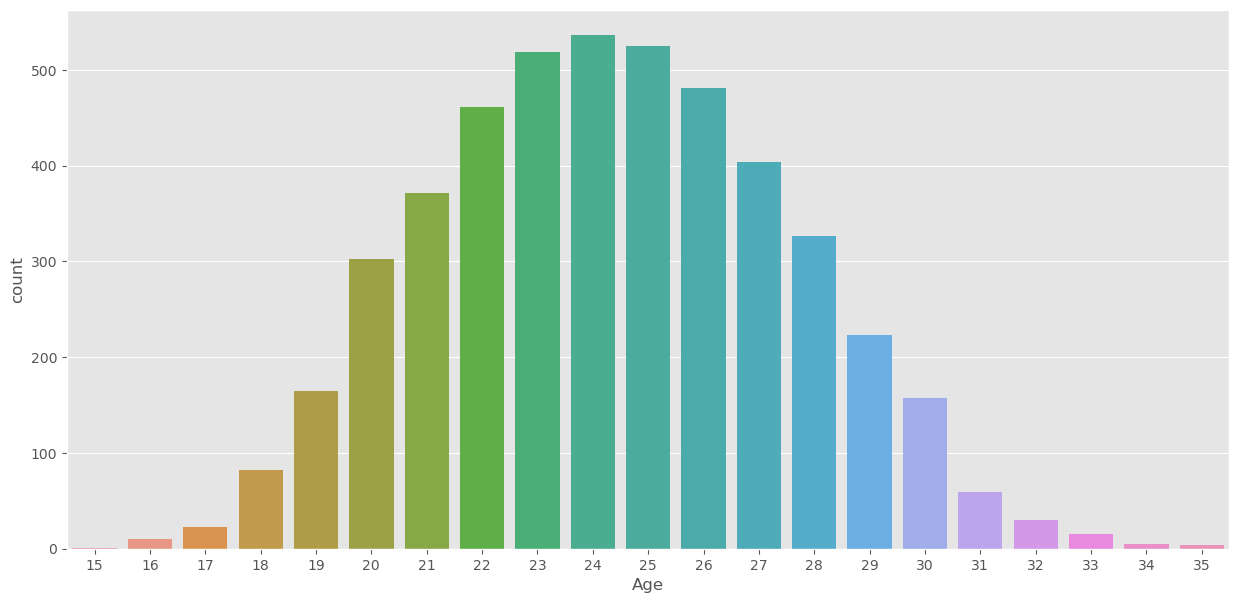

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(x='Age',data=df)

### Age and Transfer Fee with: 

#### i. ScatterPlot 

<Axes: xlabel='Age', ylabel='Transfer_fee'>

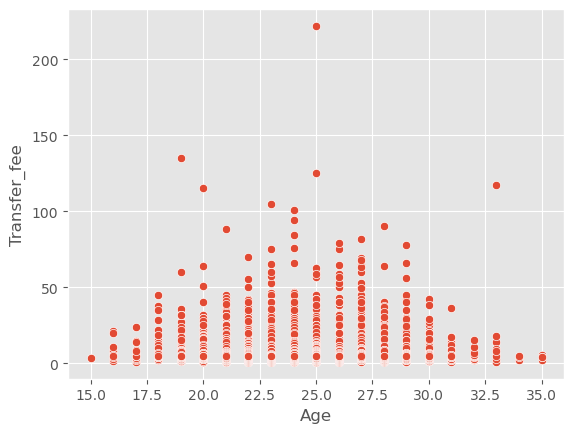

In [36]:
sns.scatterplot(x = df.Age, y = (df.Transfer_fee/1000000))

#### ScatterPlot with Marginal Distribution of Age and Transfer Fee

Also Position wise separation

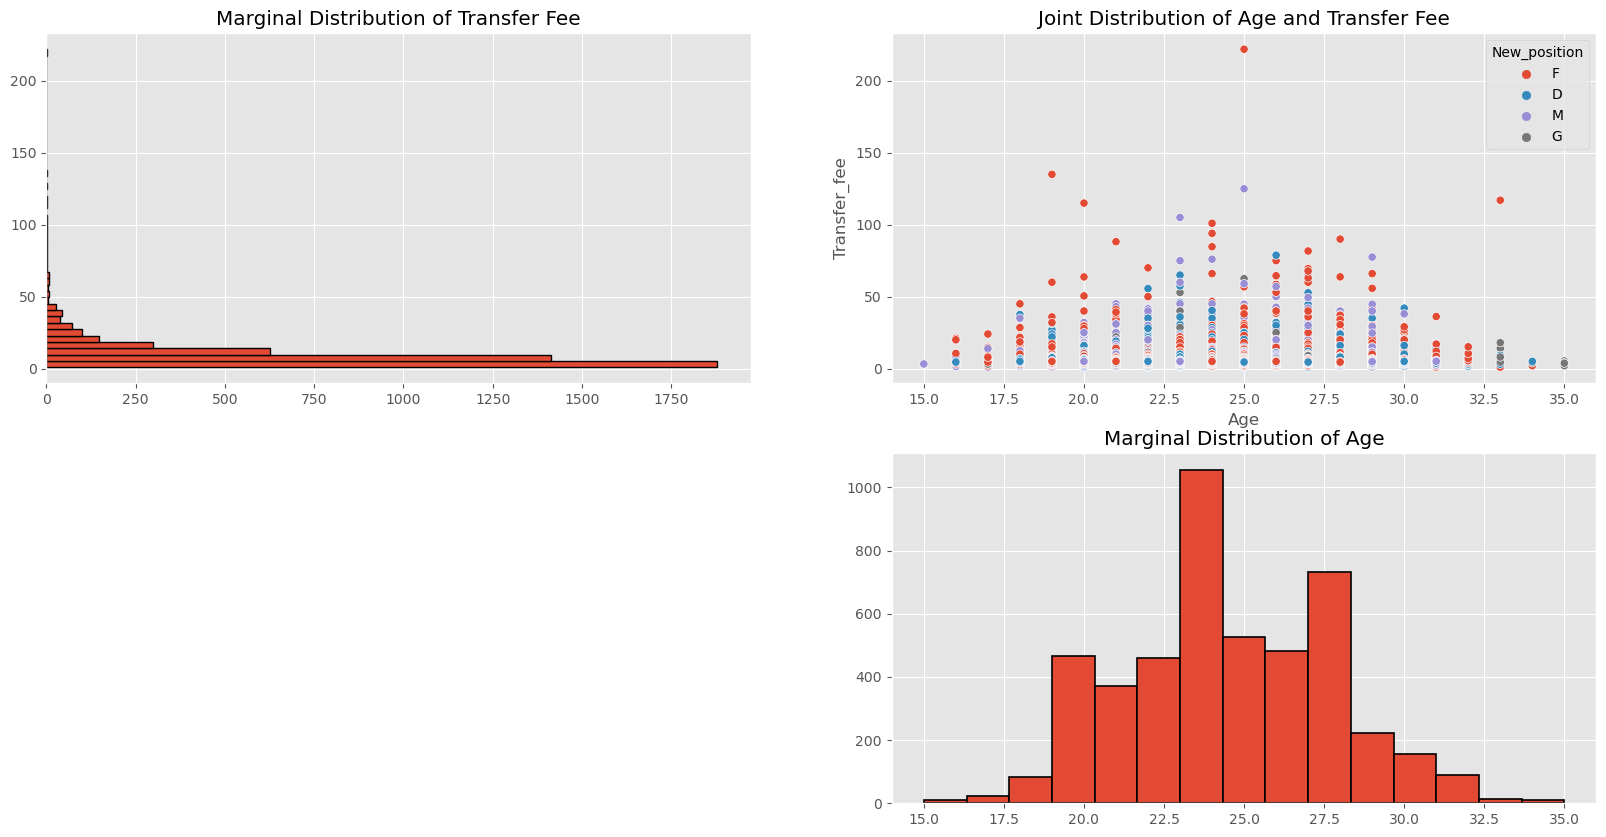

In [37]:
# Plot the data
plt.figure(figsize=(20,10))
plt.subplot(2,2,2)
sns.scatterplot(x = df.Age, y = (df.Transfer_fee/1000000),hue=df.New_position)
plt.title("Joint Distribution of Age and Transfer Fee")

# Plot the Marginal X Distribution
plt.subplot(2,2,4)
plt.hist(x = df.Age, bins = 15,edgecolor='black', linewidth=1.2)
plt.title("Marginal Distribution of Age")


# Plot the Marginal Y Distribution
plt.subplot(2,2,1)
plt.hist(x = (df.Transfer_fee/1000000),orientation = "horizontal",bins = 50,edgecolor='black', linewidth=1)
plt.title("Marginal Distribution of Transfer Fee")

# Show the plots
plt.show()

#### ii. JointPlot 

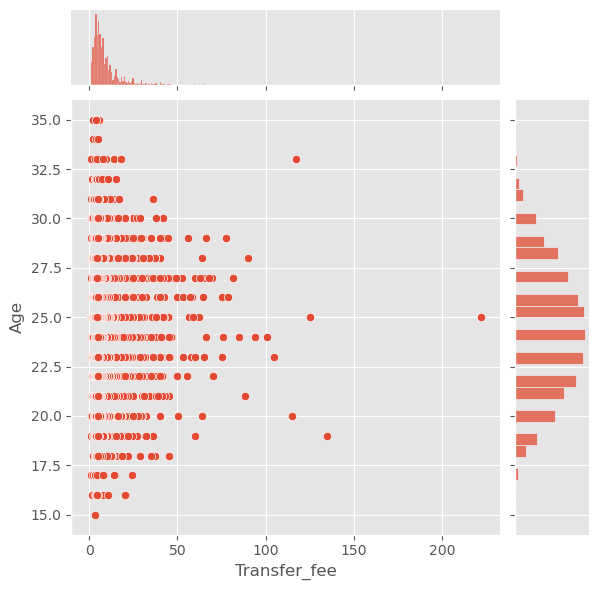

In [38]:
sns.jointplot(x= (df.Transfer_fee/1000000),  y=df.Age)

#### iii. regplot

<Axes: xlabel='Age', ylabel='Transfer_fee'>

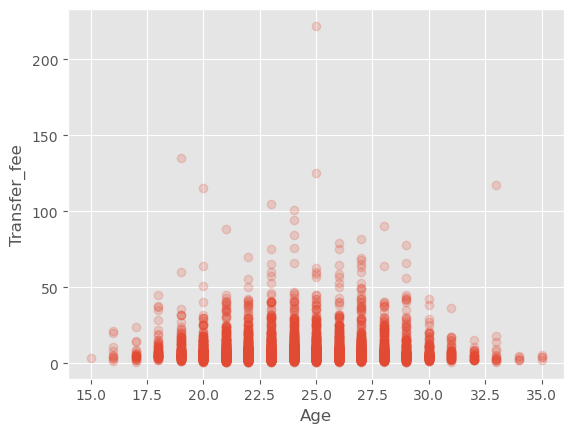

In [39]:
sns.regplot(x=df.Age, y=(df.Transfer_fee/1000000), data=df, fit_reg=False, scatter_kws={"alpha": 0.2})

#### iv. Lineplot

<Axes: xlabel='Age'>

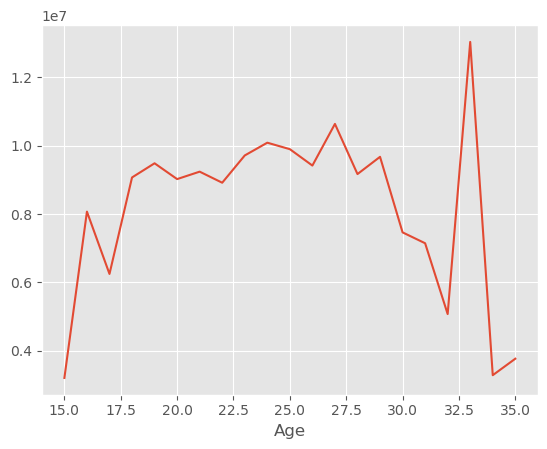

In [40]:
agetransfer = df.groupby('Age')['Transfer_fee'].agg('mean')
agetransfer.plot()

## Season and Tranfer Fee 

### Total tranfer fee per season

<Axes: xlabel='Season', ylabel='Transfer_fee'>

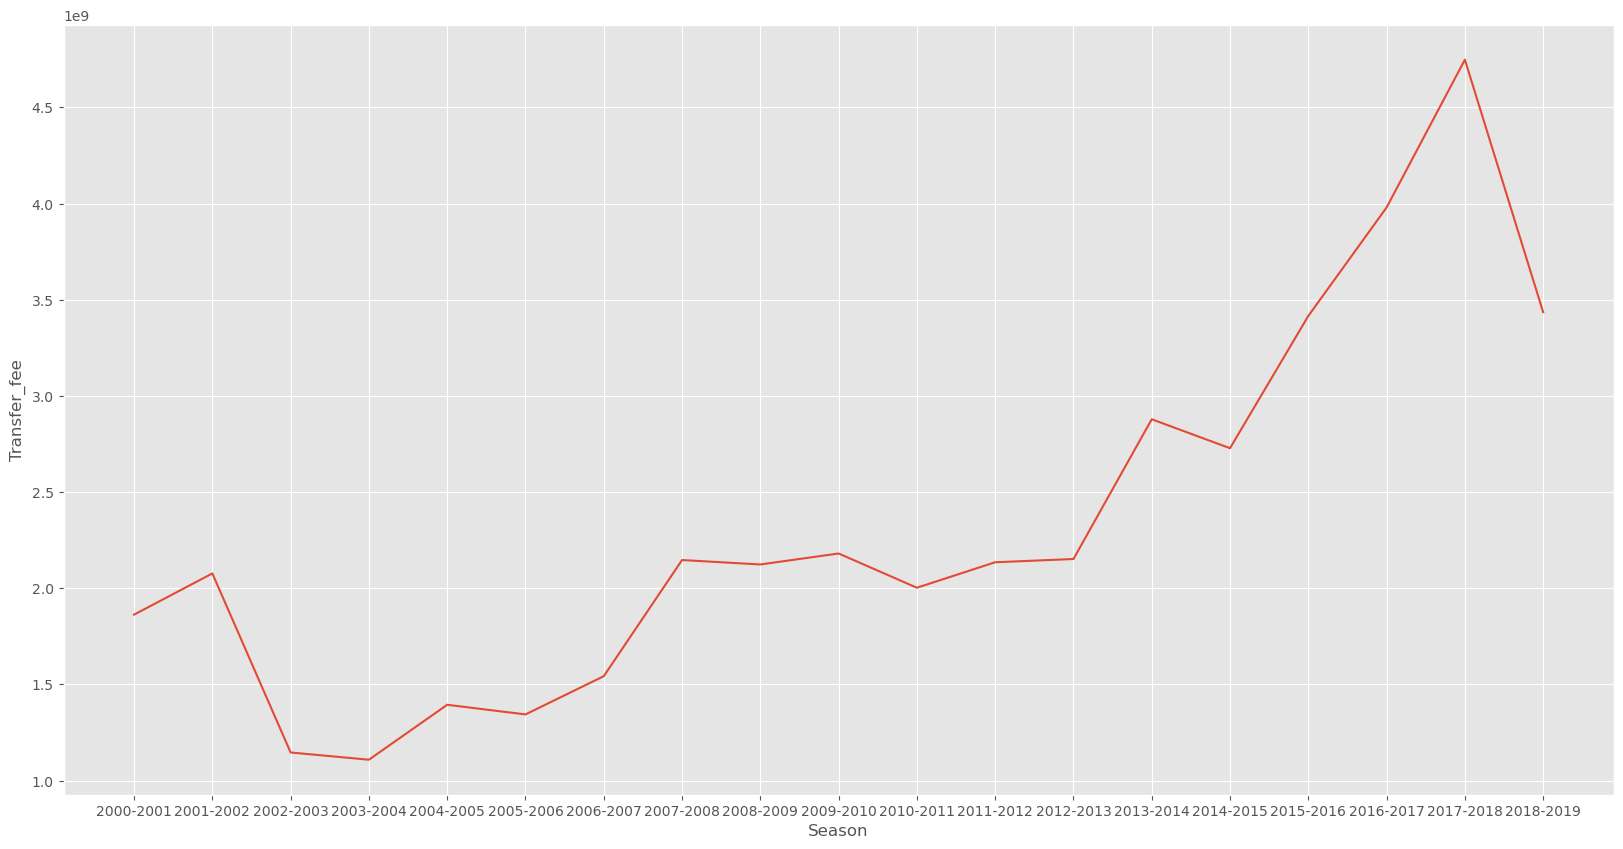

In [41]:
season_wise = df.groupby('Season')['Transfer_fee'].agg('sum').reset_index()
plt.figure(figsize=(20,10))
sns.lineplot(x='Season', y='Transfer_fee', data = season_wise)

### Total Tranfer Fee per Season for Top Leagues

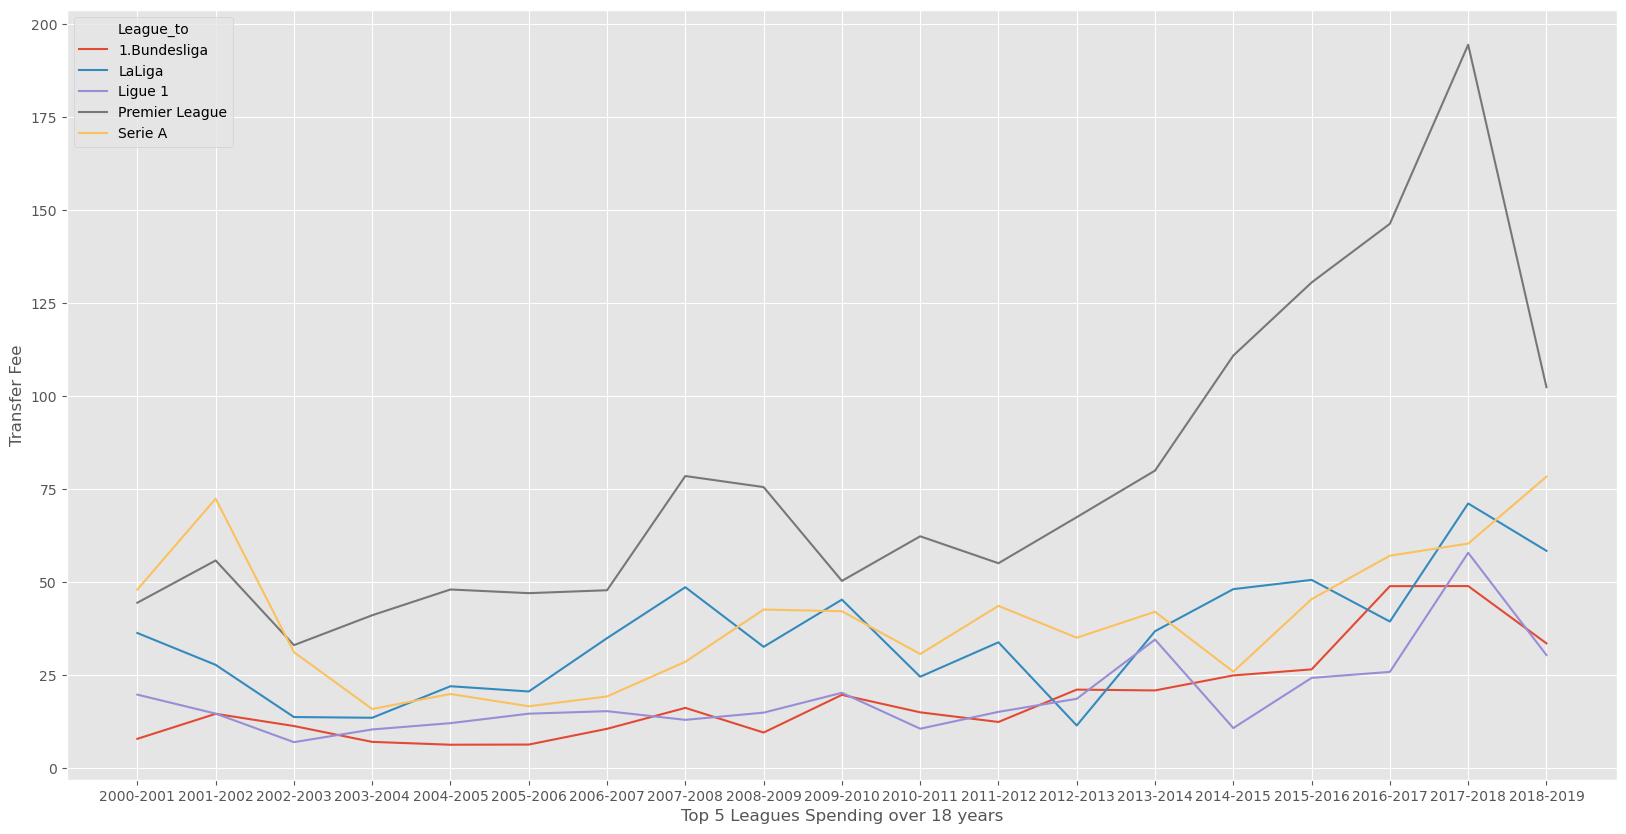

In [42]:
season_leagues = df.groupby(['League_to','Season'])['Transfer_fee'].agg('sum').reset_index()
select_leagues = ['Premier League','Serie A','LaLiga','Ligue 1','1.Bundesliga']
season_top5league = season_leagues.loc[season_leagues['League_to'].isin(select_leagues)]
plt.figure(figsize=(20,10))
#sns.lineplot(x='Season', y=(aa.Transfer_fee/10000000), data = aa,color='black')
ax = sns.lineplot(x='Season', y=(season_top5league.Transfer_fee/10000000),hue='League_to', data = season_top5league)
ax.set(xlabel="Top 5 Leagues Spending over 18 years", ylabel = "Transfer Fee")
plt.show()

### Total Position Brought each Season in Premier League

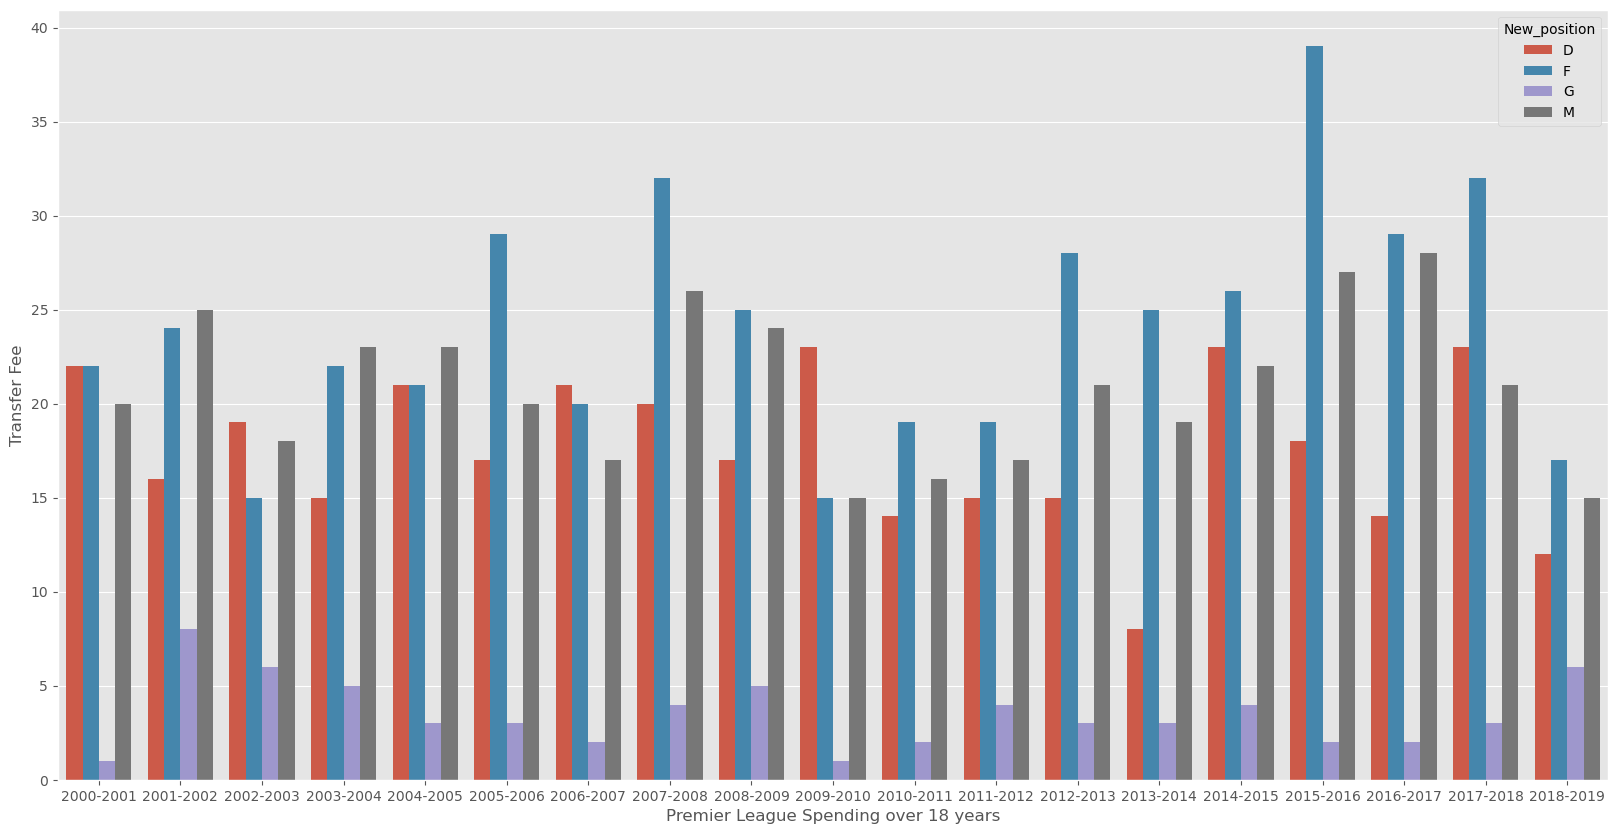

In [43]:
season_league = df.groupby(['League_to','Season','New_position']).agg(
    {'New_position': 'count'}).rename(columns={'New_position':'C'}).reset_index()
pl_league = season_league.loc[season_league['League_to']=='Premier League']

plt.figure(figsize=(20,10))
ax = sns.barplot(x='Season', y='C',hue='New_position',data = pl_league)
ax.set(xlabel="Premier League Spending over 18 years", ylabel = "Transfer Fee")
plt.show()

## Chelsea Analysis

1. Top Players Bought & Top Players Sold
2. Top Position Bought & Top Position Sold
3. Teams/Leagues to which players are sold & from which players are bought
4. Season wise buys and sell

### Separating out Chelsea Data 

In [46]:
chelsea = df.loc[(df['Team_to'] == 'Chelsea') | (df['Team_from'] == 'Chelsea') ]
chelsea.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,New_position
10,Jimmy Floyd Hasselbaink,Centre-Forward,28,Atlético Madrid,LaLiga2,Chelsea,Premier League,2000-2001,NaN,22500000,F
20,Tore André Flo,Centre-Forward,27,Chelsea,Premier League,Rangers,Scotland,2000-2001,NaN,18000000,F
41,Jesper Grönkjaer,Left Winger,23,AFC Ajax,Eredivisie,Chelsea,Premier League,2000-2001,NaN,11850000,F
52,Chris Sutton,Centre-Forward,27,Chelsea,Premier League,Celtic,Scotland,2000-2001,NaN,9500000,F
65,Mario Stanic,Right Winger,28,Parma,Serie A,Chelsea,Premier League,2000-2001,NaN,8400000,F


### Separating out Players bought by Chelsea and Players sold by Chelsea 

In [47]:
chelsea_buy = chelsea.loc[chelsea['Team_to']=='Chelsea']
chelsea_sell = chelsea.loc[chelsea['Team_from']=='Chelsea']

#### Top 5 Chelsea Buys 

In [48]:
top5buy_c = chelsea_buy[['Name','Position','Transfer_fee','Team_from']]
top5buy_c.sort_values(by='Transfer_fee',ascending = False).head()

,Name,Position,Transfer_fee,Team_from
4217,Álvaro Morata,Centre-Forward,66000000,Real Madrid
2475,Fernando Torres,Centre-Forward,58500000,Liverpool
4462,Jorginho,Defensive Midfield,57000000,SSC Napoli
1479,Andriy Shevchenko,Centre-Forward,43300000,AC Milan
4232,Tiemoué Bakayoko,Defensive Midfield,40000000,Monaco


#### Top 5 Chelsea Players Sold 

In [49]:
top5sell_c = chelsea_sell[['Name','Position','Transfer_fee','Team_to']]
top5sell_c.sort_values(by='Transfer_fee',ascending = False).head()

,Name,Position,Transfer_fee,Team_to
4216,Diego Costa,Centre-Forward,66000000,Atlético Madrid
3963,Oscar,Attacking Midfield,60000000,SIPG
3470,David Luiz,Centre-Back,49500000,Paris SG
3222,Juan Mata,Attacking Midfield,44730000,Man Utd
4225,Nemanja Matic,Defensive Midfield,44700000,Man Utd


#### League and Team from which most players are bought

In [51]:
leaguebought_c = chelsea_buy.groupby('League_from')['Position'].agg('count')
leaguebought_c.sort_values(ascending = False).head()

League_from
Premier League    21
LaLiga            14
Ligue 1           12
Serie A           10
Liga NOS           7
Name: Position, dtype: int64

In [52]:
teambought_c = chelsea_buy.groupby('Team_from')['Position'].agg('count')
teambought_c.sort_values(ascending = False).head()

Team_from
FC Barcelona    6
Marseille       4
Benfica         4
West Ham        3
Liverpool       3
Name: Position, dtype: int64

#### League and Team to which most players are sold

In [53]:
leaguesold_c = chelsea_sell.groupby('League_to')['Position'].agg('count')
leaguesold_c.sort_values(ascending = False).head()

League_to
Premier League    27
LaLiga             9
1.Bundesliga       4
Ligue 1            4
Serie A            3
Name: Position, dtype: int64

In [54]:
teamsold_c = chelsea_sell.groupby('Team_to')['Position'].agg('count')
teamsold_c.sort_values(ascending = False).head()

Team_to
Man City           3
Atlético Madrid    3
Newcastle          3
Celtic             2
Bournemouth        2
Name: Position, dtype: int64

#### Season wise buy

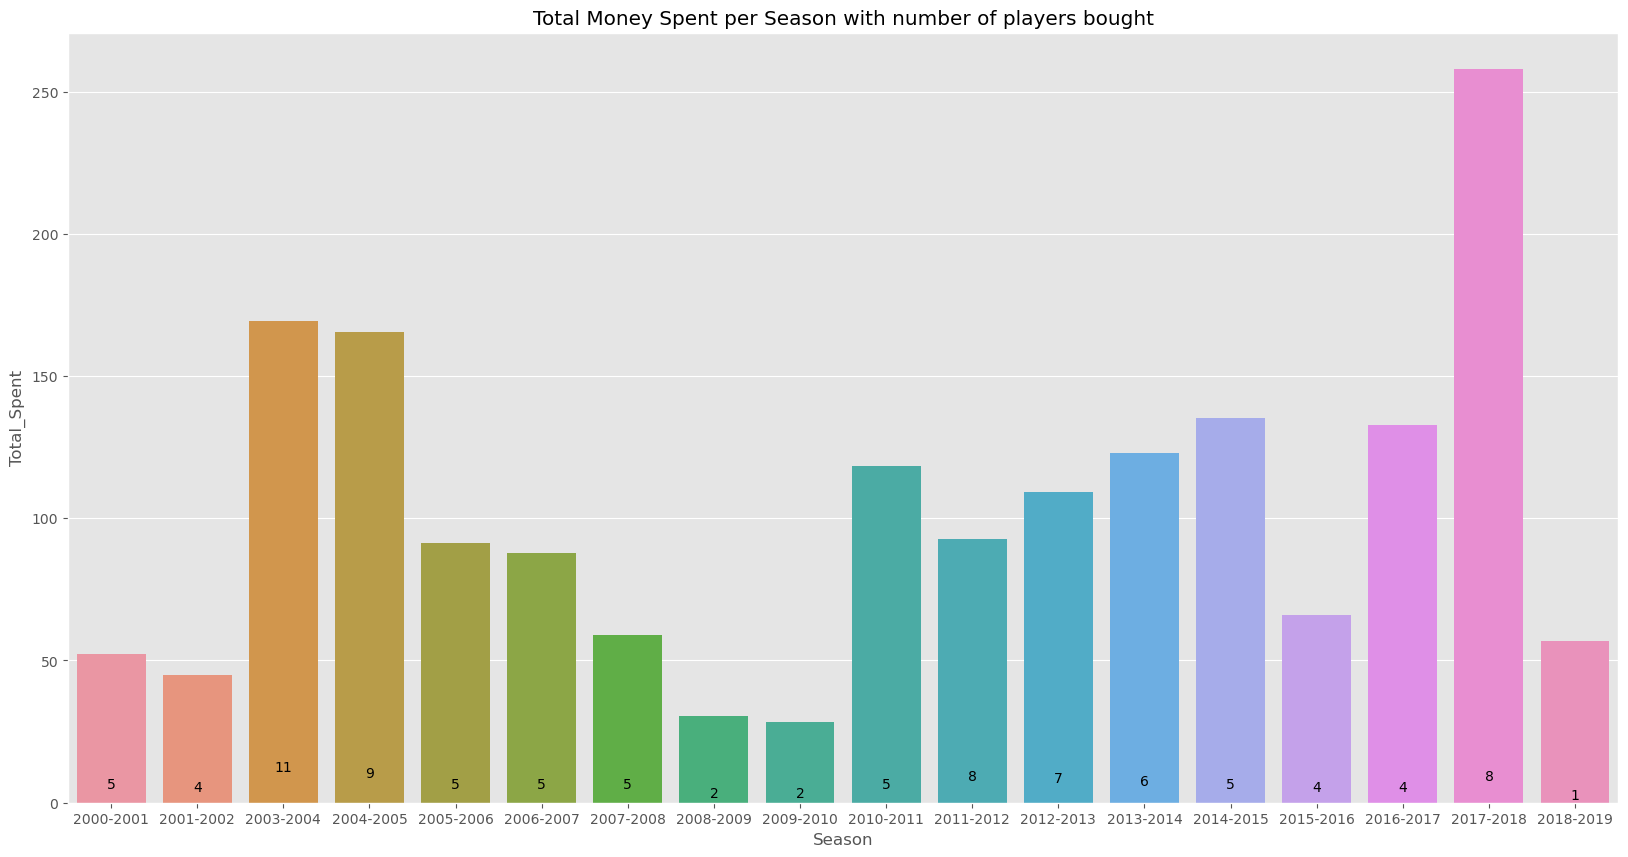

In [59]:
season_wise_buy = chelsea_buy.groupby('Season')['Name'].agg('count')
a = season_wise_buy.reset_index()

season_wise_transfer = chelsea_buy.groupby('Season')['Transfer_fee'].agg('sum')
b = season_wise_transfer.reset_index()

c = pd.merge(a,b,on='Season')
c = c.rename(columns = {'Name':'Players_bought','Transfer_fee':'Total_Spent'})

plt.figure(figsize=(20,10))
plt.title("Total Money Spent per Season with number of players bought")
g = sns.barplot(x="Season",y=(c.Total_Spent/1000000),data = c)
for index, row in c.iterrows():
    g.text(row.name,row.Players_bought, round(row.Players_bought,2), color='black', ha="center")
plt.show()

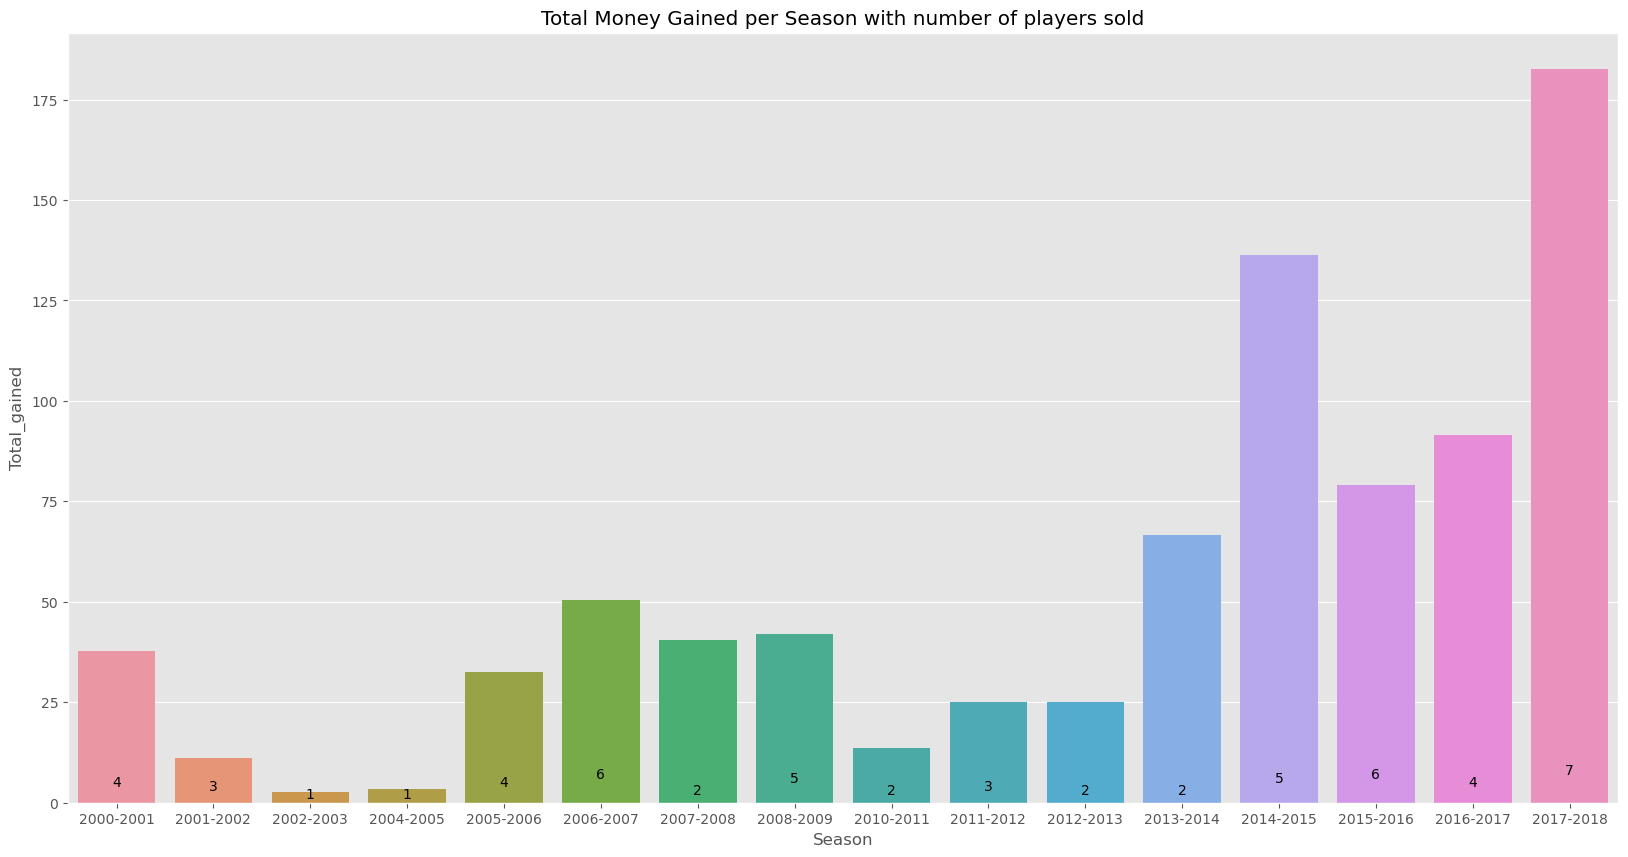

In [60]:
season_wise_sell = chelsea_sell.groupby('Season')['Name'].agg('count')
x = season_wise_sell.reset_index()

season_wise_transfer_sell = chelsea_sell.groupby('Season')['Transfer_fee'].agg('sum')
y = season_wise_transfer_sell.reset_index()

z = pd.merge(x,y,on='Season')
z = z.rename(columns = {'Name':'Players_sold','Transfer_fee':'Total_gained'})

plt.figure(figsize=(20,10))
plt.title("Total Money Gained per Season with number of players sold")
h = sns.barplot(x="Season",y=(z.Total_gained/1000000),data = z)
for index, row in z.iterrows():
    h.text(row.name,row.Players_sold, round(row.Players_sold,2), color='black', ha="center")
plt.show()

In [61]:
final_merge = pd.merge(c,z,on="Season")
final_merge['Profit(+)/Loss(-)'] = final_merge['Total_gained'] - final_merge['Total_Spent']
final_merge

,Season,Players_bought,Total_Spent,Players_sold,Total_gained,Profit(+)/Loss(-)
0,2000-2001,5,52150000,4,37700000,-14450000
1,2001-2002,4,44800000,3,11050000,-33750000
2,2004-2005,9,165500000,1,3300000,-162200000
3,2005-2006,5,91200000,4,32600000,-58600000
4,2006-2007,5,87900000,6,50400000,-37500000
5,2007-2008,5,59000000,2,40500000,-18500000
6,2008-2009,2,30500000,5,41950000,11450000
7,2010-2011,5,118500000,2,13500000,-105000000
8,2011-2012,8,92650000,3,25000000,-67650000
9,2012-2013,7,109200000,2,25000000,-84200000
